In [1]:
import matplotlib.pyplot as plt
import networkx as nx

from logic.powerflowsettings import PowerFlowSettings
from logic.powerflow import FilePowerFlow
from logic.graphanalyzer import GraphAnalyzer

import pygraphviz

In [2]:
# path to the grid network RAW file
#casename = 'test/data/positive_seq/GS-4_prior_solution.RAW'
# casename = 'test/data/positive_seq/IEEE-14_prior_solution.RAW'
# casename = 'test/data/positive_seq/IEEE-118_prior_solution.RAW'
#casename = 'test/data/positive_seq/ACTIVSg500_prior_solution_fixed.RAW'
# casename = 'test/data/positive_seq/PEGASE-9241_flat_start.RAW'
#casename = 'test/data/positive_seq/PEGASE-13659_flat_start.RAW'
#casename = 'test/data/positive_seq/GS-4_stressed.RAW'
#casename = 'test/data/positive_seq/IEEE-14_stressed_1.RAW'
#casename = 'test/data/positive_seq/IEEE-14_stressed_2_fixed.RAW'
casename = 'test/data/Taxonomy_Feeders/GC-12.47-1.glm'
#casename = 'test/data/ieee_four_bus/node.glm'

print("Running power flow solver...")
print(f'Testcase: {casename}')

settings = PowerFlowSettings(debug=False, max_iters=50, flat_start=False, infeasibility_analysis=False, tx_stepping=False, voltage_limiting=False)

powerflow = FilePowerFlow(casename, settings)

ga = GraphAnalyzer(powerflow.network)

print(f"island count: {ga.get_island_count()}")

G = ga.G


Running power flow solver...
Testcase: test/data/Taxonomy_Feeders/GC-12.47-1.glm
Loading network file: test/data/Taxonomy_Feeders/GC-12.47-1.glm
island count: 1


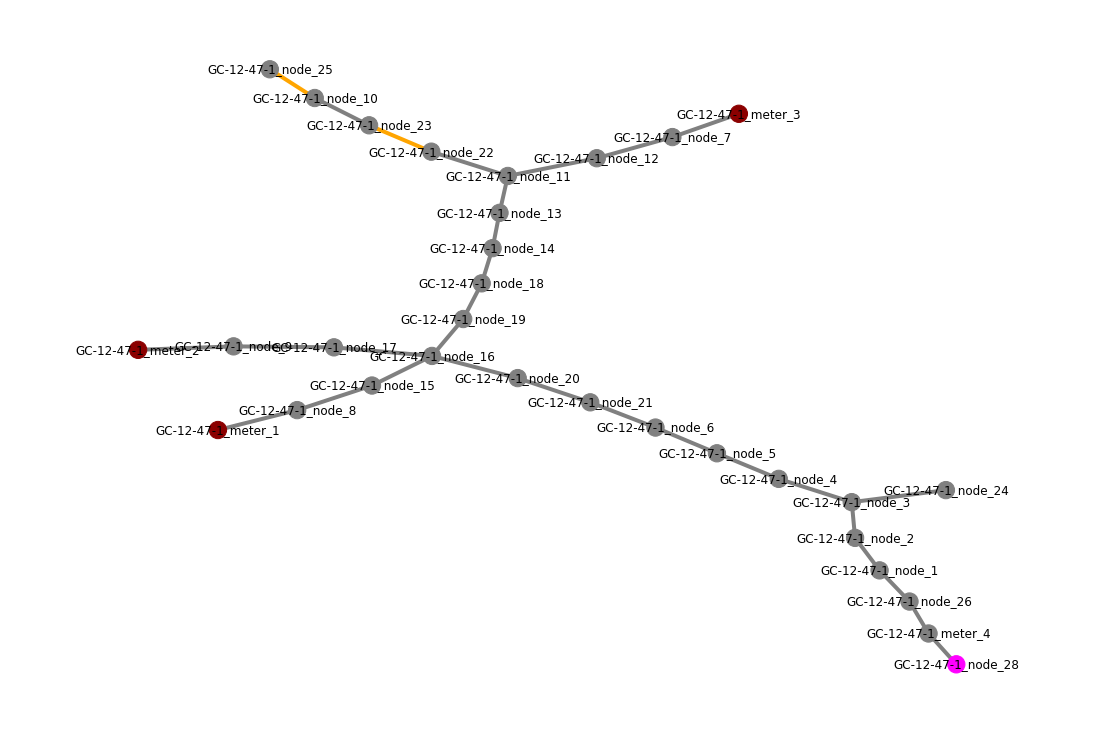

In [3]:
pos=nx.nx_agraph.graphviz_layout(G)
plt.figure(1,figsize=(15,10)) 
nx.draw(G, pos, with_labels=False, node_color=ga.node_color.values(), edge_color=[ga.edge_color[edge] for edge in G.edges()], width=4, connectionstyle='arc3, rad = 0.1')
nx.draw_networkx_labels(G, pos, ga.node_labels)
# nx.draw_networkx_edge_labels(
#     G, pos,
#     edge_labels=ga.edge_labels,
#     font_color='gray'
# )
plt.margins(x=0.1)
